<a href="https://colab.research.google.com/github/AyushDiyundi/AI-Scientific-Programming/blob/main/Reg_Mafia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [42]:
# Load Dataset
path = "https://raw.githubusercontent.com/AyushDiyundi/AI-Scientific-Programming/main/MafiaHousingProject/KC_housing_data.csv"
df = pd.read_csv(path)
features = ['sqft_living', 'bedrooms', 'bathrooms', 'condition']
# Data Cleaning: Keep rows where price > 0 and drop NaNs in key columns [cite: 4]
cols_to_use = ['price'] + features
df_clean = df[df['price'] > 0].dropna(subset=cols_to_use).copy()

print(f"Data loaded. Cleaned size: {len(df_clean)}")
df_clean.head()

Data loaded. Cleaned size: 4551


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


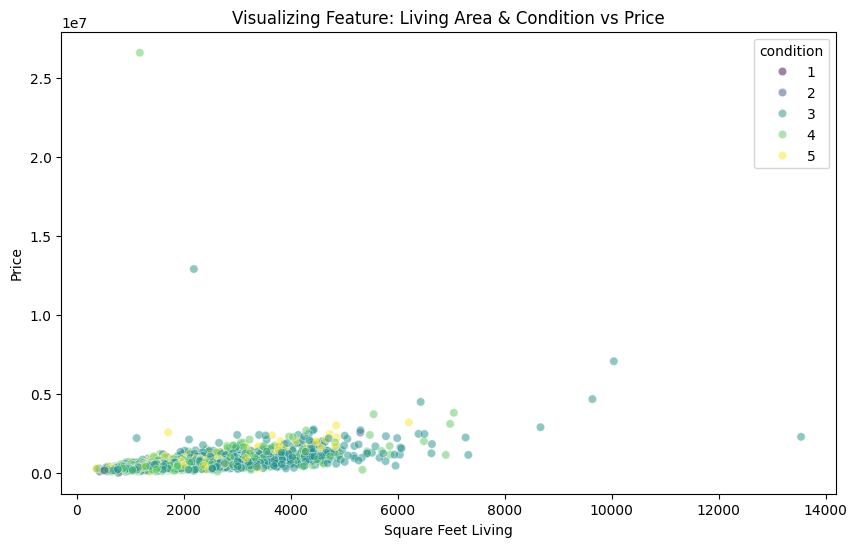

In [43]:
# Visualize sqft_living vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='sqft_living', y='price', hue='condition', alpha=0.5, palette='viridis')
plt.title("Visualizing Feature: Living Area & Condition vs Price")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.show()

### Task 1: Linear Regression (Predicting Prices)


In [44]:
# 1. Define X and y
X = df_clean[features]
y = df_clean['price']

# 2. Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit Linear Regression model using Least Squares
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# 4. Predict on test data and compute Mean Squared Error
y_pred = lin_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression MSE: {mse:,.2f}")
print("Interpretation: MSE measures the average squared difference between actual and predicted prices. [cite: 11]")

Linear Regression MSE: 70,435,273,746.36
Interpretation: MSE measures the average squared difference between actual and predicted prices. [cite: 11]


### Plot True vs Predicted

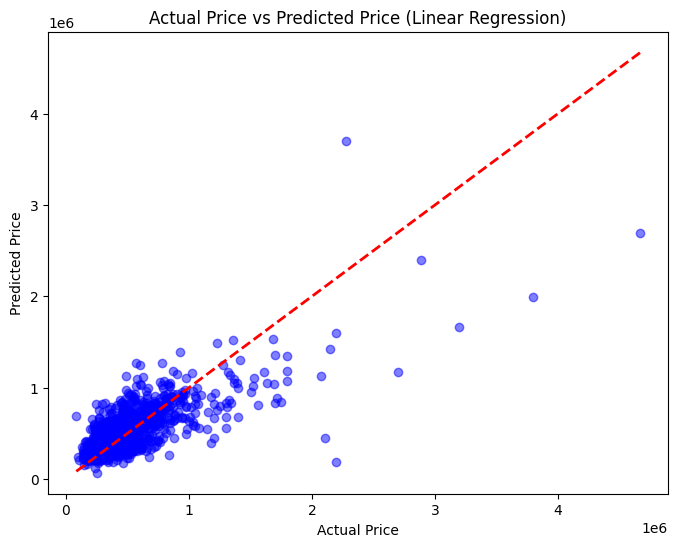

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Draw a 45-degree line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual Price vs Predicted Price (Linear Regression)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

### Task 2 - Logistic Regression (Classification)

In [46]:
# 1. Create binary target variable (1 = Above Median, 0 = Below)
median_price = df_clean['price'].median()
df_clean['is_expensive'] = (df_clean['price'] > median_price).astype(int)

# 2. Split data for classification
y_log = df_clean['is_expensive']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 3. Fit Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)

# 4. Predict and compute accuracy score
log_pred = log_model.predict(X_test_log)
accuracy = accuracy_score(y_test_log, log_pred)

print(f"Logistic Regression Accuracy: {accuracy:.2%}")

Logistic Regression Accuracy: 73.55%


### Confusion Matrix

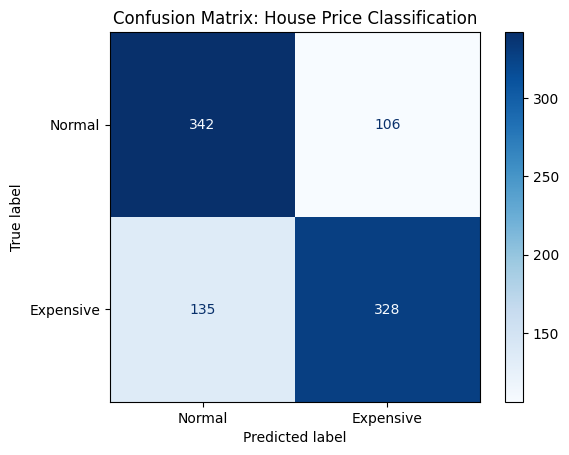

In [47]:
# Visualize classification performance
cm = confusion_matrix(y_test_log, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Expensive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: House Price Classification")
plt.show()

###Task 3: Comparison and Reflection
**Differences in Tasks and Metrics:**
* **Linear Regression:** Predicts the specific price (continuous).We use **Mean Squared Error (MSE)** to see how far off our dollar estimates are from the true values.
* **Logistic Regression:** Predicts if a house falls into the "Expensive" category (binary/discrete).We use **Accuracy** to see the percentage of correct classifications.

**Real-World Use Cases:**
* *Linear Regression:** Estimating the specific value of a home for a mortgage appraisal or a sales listing.
* **Logistic Regression:** A real estate website tagging a property as a "Hot Deal" or "Luxury Listing" to trigger specific marketing emails.


**Conclusion:**

Logistic regression uses the **Sigmoid function** to output probabilities between 0 and 1, making it ideal for decision-making tasks, whereas linear regression is best for quantifying an exact amount.